<a href="https://www.kaggle.com/code/kylecarskadden/ece4424-ml-project?scriptVersionId=94789066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from tensorflow import keras
from keras import optimizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# parameters for this script
batch_size = 256
num_classes = 10
epochs = 50

In [3]:
# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
def cnn(num_layers):

  model = Sequential()

  if num_layers >= 1:
   model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
   model.add(Activation('relu'))
   model.add(Conv2D(64, (3, 3), padding='same'))
   model.add(Activation('relu'))
   model.add(MaxPooling2D(pool_size=(2,2)))
   model.add(Dropout(0.25))
    
   if num_layers >= 2:
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Dropout(0.25)) 
                  
      if num_layers >= 3:  
         model.add(Conv2D(128, (3, 3), padding='same'))
         model.add(Activation('relu'))
         model.add(Conv2D(64, (3, 3), padding='same'))
         model.add(Activation('relu'))
         model.add(MaxPooling2D(pool_size=(2,2)))
         model.add(Dropout(0.25))  
                      
         if num_layers >= 4:
            model.add(Conv2D(256, (3, 3), padding='same'))
            model.add(Activation('relu'))
            model.add(Conv2D(256, (3, 3), padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.25)) 
                          
            if num_layers >= 5:
               model.add(Conv2D(512, (3, 3), padding='same'))
               model.add(Activation('relu'))
               model.add(Conv2D(512, (3, 3), padding='same'))
               model.add(Activation('relu'))
               model.add(MaxPooling2D(pool_size=(2,2)))
               model.add(Dropout(0.25))

  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  opt = keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.9, decay=1e-6)

  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  print(model.summary())

  return model

Training CNN with 1 convolutional layers


2022-05-05 02:06:34.754912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 02:06:34.861044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 02:06:34.862156: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 02:06:34.864035: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        2

2022-05-05 02:06:39.235348: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-05 02:06:40.894790: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


157/157 [==============================] - 11s 20ms/step - loss: 1.6006 - accuracy: 0.4295 - val_loss: 2.1778 - val_accuracy: 0.2396

Epoch 00001: val_accuracy improved from -inf to 0.23960, saving model to /kaggle/working/best_model.1convolutionallayers


2022-05-05 02:06:50.753611: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/50
157/157 [==============================] - 3s 16ms/step - loss: 1.1143 - accuracy: 0.6079 - val_loss: 2.0233 - val_accuracy: 0.5563

Epoch 00002: val_accuracy improved from 0.23960 to 0.55630, saving model to /kaggle/working/best_model.1convolutionallayers
Epoch 3/50
157/157 [==============================] - 2s 16ms/step - loss: 0.9131 - accuracy: 0.6819 - val_loss: 1.6289 - val_accuracy: 0.6615

Epoch 00003: val_accuracy improved from 0.55630 to 0.66150, saving model to /kaggle/working/best_model.1convolutionallayers
Epoch 4/50
157/157 [==============================] - 3s 16ms/step - loss: 0.7652 - accuracy: 0.7323 - val_loss: 1.0779 - val_accuracy: 0.6863

Epoch 00004: val_accuracy improved from 0.66150 to 0.68630, saving model to /kaggle/working/best_model.1convolutionallayers
Epoch 5/50
157/157 [==============================] - 2s 15ms/step - loss: 0.6446 - accuracy: 0.7795 - val_loss: 1.0258 - val_accuracy: 0.6567

Epoch 00005: val_accuracy did not improve from 0.686

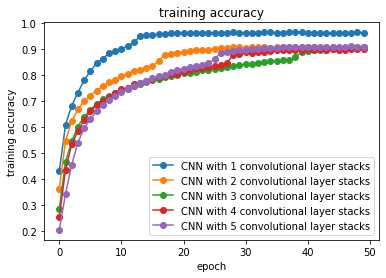

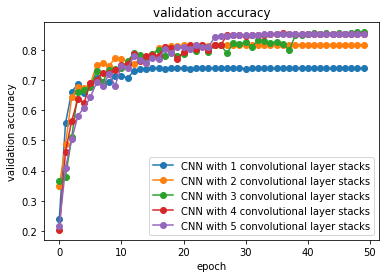

313/313 [==============================] - 2s 6ms/step - loss: 1.1775 - accuracy: 0.7327
Test accuracy for CNN with 1 convolutional layers: 0.732699990272522
313/313 [==============================] - 2s 6ms/step - loss: 0.6442 - accuracy: 0.8135
Test accuracy for CNN with 2 convolutional layers: 0.8134999871253967
313/313 [==============================] - 2s 6ms/step - loss: 0.4983 - accuracy: 0.8482
Test accuracy for CNN with 3 convolutional layers: 0.8482000231742859
313/313 [==============================] - 2s 4ms/step - loss: 0.4964 - accuracy: 0.8464
Test accuracy for CNN with 4 convolutional layers: 0.8464000225067139
313/313 [==============================] - 2s 6ms/step - loss: 0.5161 - accuracy: 0.8468
Test accuracy for CNN with 5 convolutional layers: 0.8468000292778015


In [5]:

history_cnn = dict()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5)

for i in range(5):
  print('Training CNN with {} convolutional layers'.format(i+1))
  save_best_model = ModelCheckpoint('/kaggle/working/best_model.{}convolutionallayers'.format(i+1), 
                                    monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  model =  cnn(i+1)
  history_cnn[i+1] = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_validate, y_validate),
                             shuffle=True,
                             callbacks=[save_best_model, reduce_lr])
    
# Plot training accuracy
for i in range(5):
  plt.plot(history_cnn[i+1].history['accuracy'], 'o-', label='CNN with {} convolutional layer stacks'.format(i+1))

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot validation accuracy
for i in range(5):
  plt.plot(history_cnn[i+1].history['val_accuracy'], 'o-', label='CNN with {} convolutional layer stacks'.format(i+1))
  
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
for i in range(5):
  saved_model = load_model('/kaggle/working/best_model.{}convolutionallayers'.format(i+1))
  scores = saved_model.evaluate(x_test, y_test, verbose=1)
  print('Test accuracy for CNN with {} convolutional layers: {}'.format(i+1, scores[1]))